Linear Regression with One Variable
Andrew NG MachineLearning-chapter2

数据准备

In [ ]:
# data prepare
import numpy as np

x=np.linspace(5,104,100) #5-104,100个数据

y=5*x+7 #房价五万一平，外加7万中介费

#各种噪声加加减减
np.random.seed(2332);
noise = np.random.randn(100)*3
noise=np.around(noise,decimals=4)
# print(noise)
y_noise = y + noise

data=[]
for index,value in enumerate(y_noise):
    # print(value,",",x[index])
    data.append([value,x[index]])

# 或者可以这么写文件
data_np = np.array(data)
# np.save('house_price_one_np',data_np)
np.savetxt('house_price_one_np.txt',data) #支持data或者data_np

这里才是正主

[[0.12565387]
 [1.07152892]]
[0.01075083]


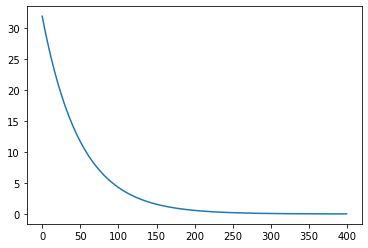

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# np的读取方式
def load_file(file_name):
    if file_name.endswith('.txt'):
        return np.loadtxt(file_name)
    elif file_name.endswith('.npy'):
        return np.load(file_name)
    else:
        print('unsupport file type')

def mean_normalization_min_man(input):
    # 数据映射到0-1之间
    # out=(x-x_min)/(x_max-x_min)
    min=np.min(input)
    max=np.max(input)
    output=(input-min)/(max-min)
    # print(output)
    return output

# z-score标准化
def mean_normalization_z_score(input):
    # out=(x-x_mean)/x_std,均值为0，标准差为1
    mean_value=np.mean(input,0)
    std_diff=np.std(input,0)
    output=(input-mean_value)/std_diff
    # print(output)
    # print(np.mean(output,0))
    return output

def loss_func(x_label,y_label,theta):
    J = np.mean(np.power((np.dot(x_label,theta)-y_label),2))/2
#     J = np.sum(np.power((np.dot(x_label,theta)-y_label),2))/(len(y_label)*2)
    return J


def gradient_descent(y_label,x_label,theta,lr,num_iters):
    # 梯度下降，找最好的theta值，使收敛

    # 用来记录所有计算出的损失，别问为啥用J，吴恩达用的就是J，如机器学习17页
    J_history=np.zeros((num_iters,1))
    theta[0]=7
    theta[1]=5


    for i in range(num_iters):
        # hypothesis的定义见机器学习第16页，可以理解为你的方程
        hypothesis=np.dot(x_label,theta)

        # 这个公式的推导见P27
        # theta:2*1
        temp_theta=theta-(lr/len(x_label))*np.dot(np.transpose(x_label),(hypothesis-y_label))

        # temp=(lr/len(x_label))*np.sum(np.dot(np.transpose(x_label),(hypothesis-y_label)))
        # print('aaaaaaaaa',temp.shape)
        # print(temp)
        theta=temp_theta
        J_history[i]=loss_func(x_label,y_label,theta)

    return theta,J_history

    print(hypothesis)

def line_regression(lr,num_iters):
    data=load_file('house_price_one_np.txt')
    # print(data)
    price=data[:,0].reshape(-1,1)
    square=data[:,1].reshape(-1,1)
    # 或者可以这样写，保证两个维度的值有效
    # square=data[:,1::]
    # for index,value in enumerate(price):
    #     print(square[index],value)
    # print(price.shape,",",square.shape)
    # print(type(price),type(square))
    # 用哪种效果更好呢？
    # price=mean_normalization_min_man(price)
    price=mean_normalization_z_score(price)
    square=mean_normalization_z_score(square)
    # 添加一个bias,与吴恩达表示一致，机器学习16页，bias在前
    square=np.hstack((np.ones((len(square),1)),square))
    # print(square.shape)
#     print(square)
    # 有几个参数就要有几个theta
    num_theta=square.shape[1] #2 y=ax+b y=theta1 + theta2 * x
    # 三行一列
    theta=np.zeros((num_theta,1))

    theta_new,J_history=gradient_descent(price,square,theta,lr,num_iters)
    print(theta_new)
    print(J_history[-1])
    return  theta_new,J_history


lr=0.01
num_iters=400


theta_result,J_h=line_regression(lr,num_iters)

plt.plot(np.arange(num_iters),J_h)

<class 'tuple'>
8.108491803554523  aa  4.978963948154446
theta: (array([8.1084918 , 4.97896395]), 3)


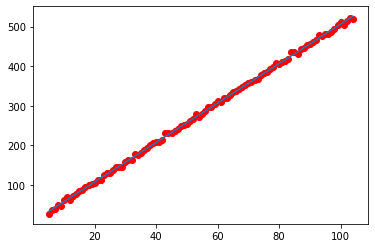

In [10]:
from scipy.optimize import leastsq
import numpy as np
import matplotlib.pyplot as plt

def loss_func(theta, price, square):
#     J = np.mean(np.power((np.dot(x_label,theta)-y_label),2))/2
#     J = np.sum(np.power((np.dot(x_label,theta)-y_label),2))/(len(y_label)*2)
#     print('theta,',theta.size)
#     print('square',square.shape)
#     print('price',price.shape)
    
#     J=np.power((np.dot(square,theta)-price),2)
    y=theta[0]+theta[1]*square
#     y=np.dot(square,theta)
    J=price-y
#     print('y shape',y.shape)
#     print('J',J.shape)
#     print(J)
#     print(type(theta))
    return J
def func(theta,x):
    return theta[1]*x+theta[0]
    

def load_file(file_name):
    if file_name.endswith('.txt'):
        return np.loadtxt(file_name)
    elif file_name.endswith('.npy'):
        return np.load(file_name)
    else:
        print('unsupport file type')
        

def main():
    data=load_file('house_price_one_np.txt')
    # print(data)
    price=data[:,0].reshape(1,-1)[0]
    square=data[:,1].reshape(1,-1)[0]
#     print(type(price))
#     print(type(square))
    
    theta_init=[0,0]
#     theta_init=np.array(theta_init).reshape(-1,1)
#     print(theta_init.size)
#     print(square.shape)
#     leastsq不能处理二维数据，请拆分
    theta=leastsq(loss_func,theta_init,args=(price,square))
#     print(theta[1]*square)
    print(type(theta))
    print(theta[0][0],' aa ',theta[0][1])
    y_fit=theta[0][1]*square+theta[0][0]
    plt.scatter(square,price,color='r')
    plt.plot(square,y_fit)
    return theta
    
if __name__=='__main__':
    theta = main()
    print('theta:',theta)



import numpy as np
def mean_normalization_z_score(input):
    # out=(x-x_mean)/x_std,均值为0，标准差为1
    mean_value=np.mean(input,0)
    std_diff=np.std(input,0)
    output=(input-mean_value)/std_diff
    # print(output)
    # print(np.mean(output,0))
    return output

a1=np.array([1,10,100])
a2=np.array([0.01,0.1,1])
a3=np.array([-11000,0.0000001,100000])
print(mean_normalization_z_score(a1))
print(mean_normalization_z_score(a2))
print(mean_normalization_z_score(a3))
aaa=np.zeros((100,1))
print(aaa.shape)

In [ ]:
ls=[1,2,3,4,5]
a=3
print(ls+a)

In [91]:
ls=[1,2,3,4,5]
a=3
print(ls+a)

TypeError: can only concatenate list (not "int") to list